# Part IV: Machine learning model training

In [1]:
import pandas as pd

# import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# read Part III csv as DataFrame
df = pd.read_csv("../Dataset/thebiglist_clean_extended_final.csv")
df

,Stars,isSpicy,hasChicken,hasBeef,hasSeafood,from_Acecook,from_Indomie,from_Itsuki,from_JML,from_KOKA,...,in_Hong Kong,in_Indonesia,in_Japan,in_Malaysia,in_Other,in_Singapore,in_South Korea,in_Taiwan,in_Thailand,in_United States
0,5.0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,3.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4.5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3.5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,3.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3688,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3689,2.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3690,2.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
# look at Stars
df["Stars"].value_counts()

5.000    667
3.500    543
3.750    535
4.000    439
4.500    243
3.250    222
4.250    217
3.000    172
2.750    110
2.000     95
2.500     95
4.750     93
1.500     50
0.000     40
1.000     38
2.250     29
1.750     28
0.500     20
0.250     17
1.250     14
1.100      2
3.100      2
2.900      2
0.750      2
2.800      2
4.125      2
2.850      1
2.300      1
3.600      1
3.700      1
3.650      1
0.100      1
3.400      1
3.125      1
1.800      1
3.200      1
2.100      1
2.125      1
0.900      1
Name: Stars, dtype: int64

In [4]:
# import plotting library
import matplotlib.pyplot as plt

(array([  58.,   23.,   54.,   79.,  127.,  210.,  399., 1081.,  658.,
        1003.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

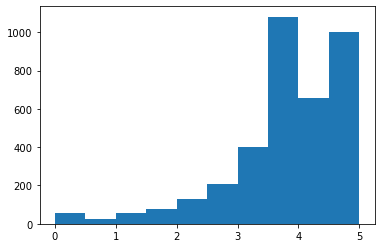

In [5]:
plt.hist(df["Stars"])

In [6]:
df["Stars"].median()
# cut-off for a "Good" rating can be anything more than 3.75

3.75

In [7]:
len(df)

3692

In [8]:
len(df[df["Stars"] > 3.75])
# check to see if dividing would create an imbalance

1661

In [9]:
# qcut() automatically splits data into intervals
pd.qcut(df["Stars"], q = 2, labels = [0, 1])

0       1
1       0
2       1
3       1
4       0
       ..
3687    0
3688    0
3689    0
3690    0
3691    0
Name: Stars, Length: 3692, dtype: category
Categories (2, int64): [0 < 1]

In [10]:
df["binStars"] = pd.qcut(df["Stars"], q = 2, labels = [0, 1])
df

,Stars,isSpicy,hasChicken,hasBeef,hasSeafood,from_Acecook,from_Indomie,from_Itsuki,from_JML,from_KOKA,...,in_Indonesia,in_Japan,in_Malaysia,in_Other,in_Singapore,in_South Korea,in_Taiwan,in_Thailand,in_United States,binStars
0,5.0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,3.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.5,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,3.5,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3688,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3689,2.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3690,2.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
# check if split is roughly equal
df["binStars"].value_counts()

0    2031
1    1661
Name: binStars, dtype: int64

In [12]:
# prepare independent and dependent variables
X = df.drop(["binStars", "Stars"], axis = 1)
y = df["binStars"]

In [13]:
# split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   stratify = y)

In [14]:
# set baseline with a DummyClassifier
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


In [15]:
# assess performance of DummyClassifier
confusion_matrix(y_test, dummy_pred)

array([[227, 180],
       [178, 154]], dtype=int64)

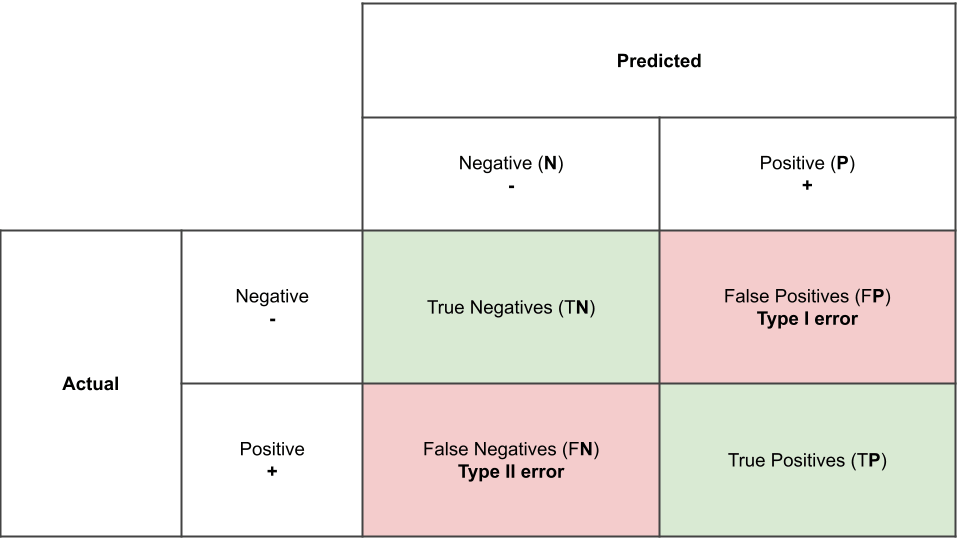

Ideally, (1,1) and (2,2) are maximised, (1,2) and (2,1) are minimised.

In [16]:
print(classification_report(y_test, dummy_pred))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56       407
           1       0.46      0.46      0.46       332

    accuracy                           0.52       739
   macro avg       0.51      0.51      0.51       739
weighted avg       0.52      0.52      0.52       739



Hence, any accuracy above 0.52 is an improvement.

In [17]:
# start with LogisticRegression
logr = LogisticRegression()
logr.fit(X_train, y_train)
logr_pred = logr.predict(X_test)

In [18]:
confusion_matrix(y_test, dummy_pred)

array([[227, 180],
       [178, 154]], dtype=int64)

In [19]:
confusion_matrix(y_test, logr_pred)

array([[280, 127],
       [135, 197]], dtype=int64)

In [20]:
print(classification_report(y_test, logr_pred))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       407
           1       0.61      0.59      0.60       332

    accuracy                           0.65       739
   macro avg       0.64      0.64      0.64       739
weighted avg       0.64      0.65      0.65       739



Higher accuracy score of 0.66.

In [21]:
# DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

In [22]:
confusion_matrix(y_test, tree_pred)

array([[263, 144],
       [143, 189]], dtype=int64)

In [23]:
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65       407
           1       0.57      0.57      0.57       332

    accuracy                           0.61       739
   macro avg       0.61      0.61      0.61       739
weighted avg       0.61      0.61      0.61       739



In [24]:
# RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)

In [25]:
confusion_matrix(y_test, forest_pred)

array([[258, 149],
       [135, 197]], dtype=int64)

In [26]:
print(classification_report(y_test, forest_pred))

              precision    recall  f1-score   support

           0       0.66      0.63      0.65       407
           1       0.57      0.59      0.58       332

    accuracy                           0.62       739
   macro avg       0.61      0.61      0.61       739
weighted avg       0.62      0.62      0.62       739



Compare all 4 confusion matrices:

In [27]:
confusion_matrix(y_test, dummy_pred)

array([[227, 180],
       [178, 154]], dtype=int64)

In [28]:
confusion_matrix(y_test, logr_pred)

array([[280, 127],
       [135, 197]], dtype=int64)

In [29]:
confusion_matrix(y_test, tree_pred)

array([[263, 144],
       [143, 189]], dtype=int64)

In [30]:
confusion_matrix(y_test, forest_pred)

array([[258, 149],
       [135, 197]], dtype=int64)

In [31]:
# array containing a list of coefficients of the column values
# positive -> factor of 1
# negative -> factor of 0
logr.coef_[0]

array([ 0.45281704, -0.51656196, -0.31115649, -0.2733584 , -0.73301345,
        0.05406638,  0.34892486, -0.03295536, -0.47671425,  0.19235191,
        0.48429839, -0.3638704 ,  0.32498692, -0.44785224, -0.28804005,
        0.70182309,  2.03628311, -0.13073911,  0.21814501,  0.59024356,
       -0.35440336, -0.70370244,  0.1456187 ,  0.59178273, -0.18569819,
       -0.00916368, -1.0041794 , -0.0726863 , -0.65198746, -0.07456054,
       -0.48899572, -0.46649181, -0.13190935,  0.51955088, -0.44663974,
        1.23608096,  0.19297448, -0.07415143,  0.37314459,  1.25724909,
        0.69541343,  0.71937834, -0.8465426 ,  0.80698684,  0.30773823,
        0.72257926, -0.90356031,  0.12145574])

In [32]:
logr_feature = pd.DataFrame({"feature": X.columns,
                            "importance": logr.coef_[0]})

# factors that tend to give higher Stars (top) and lower Stars (bottom)
logr_feature.sort_values("importance", ascending = False)

,feature,importance
16,from_MyKuali,2.036283
39,in_Indonesia,1.257249
35,is_Other,1.236081
43,in_Singapore,0.806987
45,in_Taiwan,0.722579
41,in_Malaysia,0.719378
15,from_Master Kong,0.701823
40,in_Japan,0.695413
23,from_Samyang Foods,0.591783
19,from_Nongshim,0.590244


In [33]:
tree_feature = pd.DataFrame({"feature": X.columns,
                            "importance": tree.feature_importances_})

# factors that tend to give higher Stars (top) and lower Stars (bottom)
tree_feature.sort_values("importance", ascending = False)

,feature,importance
42,in_Other,0.144864
0,isSpicy,0.090578
36,is_Pack,0.062801
1,hasChicken,0.060505
3,hasSeafood,0.054864
2,hasBeef,0.053944
46,in_Thailand,0.047690
34,is_Cup,0.045307
20,from_Other,0.040241
37,is_Tray,0.038480


In [34]:
forest_feature = pd.DataFrame({"feature": X.columns,
                            "importance": forest.feature_importances_})

# factors that tend to give higher Stars (top) and lower Stars (bottom)
forest_feature.sort_values("importance", ascending = False)

,feature,importance
42,in_Other,0.090844
0,isSpicy,0.086077
36,is_Pack,0.066891
1,hasChicken,0.059681
3,hasSeafood,0.058868
34,is_Cup,0.058069
2,hasBeef,0.044062
20,from_Other,0.042943
47,in_United States,0.035115
18,from_Nissin,0.030513


### The End
Recap:
1. Part I - Collected and cleaned dataset for project
2. Part II - Extracted additional information (informed by domain expertise), visualised features in the data, performed statistical tests of difference
3. Part III - Engineered new columns based on categorical columns
4. Part IV - Trained ML model to predict instant ramen binned Stars